### Linear regression model 

A linear model makes a prediction by computing a **weighted sum of the input features** plus a constant called the **bias term** (or intercept term): 

$\hat{y}$ = $\theta_{0}$ + $\theta_{1}$$x_{1}$ + $\theta_{2}$$x_{2}$ + ... + $\theta_{n}$$x_{n}$

 * $\hat{y}$ = predicted value 
 * n = number of features 
 * $x_{i}$ = i-th feature value 
 * $\theta_{j}$ = j-th model parameter, including the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ ... $\theta_{n}$

In **vectorized form**, the linear regression model prediction is: 

$\hat{y}$ = $h_{\theta}$(x) = $\theta$x

 * $\theta$ = model's parameter vector, containing the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ ... $\theta_{n}$
 * x = instances' feature vector, containing $x_{0}$ to $x_{n}$, with $x_{0}$ always equal to 1 
 * $\theta$x = dot product of the vectors $\theta$ and x 
 * $h_{\theta}$ = hypothesis function using the model parameters $\theta$

### Training a linear regression model 

#### 1. Cost function

Cost function: Mean Squared Error (MSE)

MSE(X, $h_{\theta}$) = $\frac{1}{2}$ $\sum_{i = 1}^{m}$ ($\theta$$x^{(i)}$ - $y^{(i)}$)$^{2}$

To minimize the MSE, we can use: 

 * **Closed-form equation (Normal equation)** = directly computes the model parameters that best fit the model to the training set (model parameters that minimize the MSE over the training set) 
 * **Iterative approach** called **Gradient Descent** = gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the Normal equation

#### 2. Normal equation (closed-form solution)

$\hat{\theta}$ = ($X^{T}$ $X$)$^{-1}$ $X^{T}$ $y$

 * $\hat{\theta}$ = value of $\theta$ that minimizes the cost function 
 * y = vector of target values 

In [4]:
# Generate linear-looking data 
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # Gaussian noise 

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best # not too far from the real intercept and slope of the model 

array([[4.13585256],
       [2.84301161]])

In [7]:
# Make predictions using the parameter vector computed with the closed form solution 
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.13585256],
       [9.82187578]])

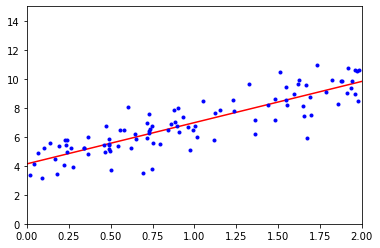

In [8]:
import matplotlib.pyplot as plt 

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15]) # x and y min and max coordinates 
plt.show()

In [9]:
# in sklearn 
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.13585256]), array([[2.84301161]]))

In [10]:
lin_reg.predict(X_new)

array([[4.13585256],
       [9.82187578]])

LinearRegression class in sklearn is based on the scipy.linalg.lstsq() function, which computes 

$\hat{\theta}$ = ($X^{+}$ $y$)

 * $X^{+}$ = pseudoinverse of X, which is computed using Singular Value Decomposition. SVD decomposes the training set $X$ into the matrix multiplication of $U$ $\sum_{}^{+}$ $V^{T}$ --> this is useful because the Normal equation may not work of $X^{T}$ $X$ is not invertible, such as when m < n or if some features are redundant. On the other hand, the pseudoinverse of a matrix is always defined. 

#### 3. Gradient descent 

Iterative procedure to tweak parameters in order to minimize a cost function. It measures the local gradient of the cost function with respect to the parameter vector $\theta$ and it goes in the direction of the descending gradient. Once the gradient is 0, we have reached a minimum. 

 1. Start by filling $\theta$ with random values (random initialization) 
 2. Improve $\theta$ gradually at each step attempting to decrease the cost function 
 3. Algorithm converges to a minimum 
 
Important hyperparameter in Gradient Descent is the size of the steps: **learning rate**

MSE cost function for a Linear Regression model is a convex function, meaning that if we pick any two points on the curve, the line segment joining them never crosses the curve. --> there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. Because of these two features, Gradient Descent is guaranteed to approach arbitrarily close the global minimum. 

**!!** When using Gradient Descent, we should ensure that all features have a similar scale or it will take much longer to converge. 

#### 3a. Batch Gradient Descent 

To implement Gradient Descent, we need to compute the gradient of the cost function with respect to each model parameter $\theta_{j}$ (partial derivatives). For MSE, the partial derivatives are: 

$\displaystyle \frac{\partial MSE(\theta)}{\partial \theta_{j}}$ =  $\frac{2}{m}$ $\sum_{i = 1}^{m}$ ($\theta$$x^{(i)}$ - $y^{(i)}$)$x_{j}^{(i)}$

Instead of computing these partial derivatives individually, we can instead compute them in one go using a gradient vector which contains all the partial derivatives of the cost function (one for each model parameter): 

$\nabla_{\theta}$ MSE($\theta$) = $\frac{2}{m}$ $X^{T}$ ($X$ $\theta$ - $y$)

This notation involves calculations over the full training set $X$ at every step. As a result, Batch Gradient Descent is very slow on large trianing sets but scales well with the number of features. 

Once we have the gradient vector, which by definition points uphill, we go in the opposite direction to go downhill. This means subtracting $\nabla_{\theta}$ MSE($\theta$) from $\theta$. We also multiply the gradient vector by the learning rate $\eta$ to determine the size of the downhill step. 

$\theta^{(next step)}$ = $\theta$ - $\eta$ $\nabla_{\theta}$ MSE($\theta$) 

In [12]:
eta = 0.1 # Specify learning rate 
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization of the parameters 
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta # same as what the normal equation found!! 

array([[4.13585256],
       [2.84301161]])

#### 3b. Stochastic Gradient Descent 

The main problem with Batch Gradient Descent is that it uses the whole training set to compute gradients at every step, which makes it slow as the dataset gets large. Stochastic Gradient Descent, instead, picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

 * faster implementation 
 * stochasticy makes it less regular than Batch Gradient Descent 
 * finds good but not optimal parameter values
 * when the cost function is very irregular, it can help the algorithm jump out of local minima 
 * to settle at the minimum, we can gradually reduce the learning rate by setting a **learning schedule**, which determines the learning rate at each iteration. 

In [13]:
n_epochs = 50 
t0, t1 = 5, 50 # learning schedule hyperparameters 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization of model parameters 

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta 

array([[4.08471239],
       [2.78775735]])

**!!** Since the instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all. If we want to be sure that the algorithm goes through every instance at each epoch, we can **shuffle the training set**, then go through it instance by instance, then shuffle it again... Shuffling is important because it makes sure that instances are **independent and identically distributed (IID)** --> otherwise, if the instances are for example sorted by label (hence not IID), SGD will start by optimizing for one label, then the next and so on without ever settling close to the global minimum.

In [15]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1860683]), array([2.99340302]))

#### 3c. Mini-batch Gradient Descent

At each step, instead of computing the gradients based on the full training set or based on just one instance, Mini-batch Gradient Descent computes the gradients on a small random set of instances called a mini-batch. 

 * progress in the parameter space is less erratic that with SGD 

#### End of notebook